<a href="https://colab.research.google.com/github/dushyantmaharshi/AirBnb-Data-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Airbnb EDA Project**

**Airbnb is an online marketplace connecting travelers with local hosts. On one side, the platform enables people to list their available space and earn extra income in the form of rent. On the other, Airbnb enables travelers to book unique homestays from local hosts, saving them money and giving them a chance to interact with locals. Catering to the on-demand travel industry, Airbnb is present in over 190 countries across the world.**

This dataset has 48895 observations in it with 16 columns and it is a mix between categorical and numeric values.

1. id : Column id is a unique column in the dataset
2. name : This column contains the name of the listing.
3. host_id : This column contains the host IDs of the various hosts. Each host has a unique host ID.
4. host_name : This column contains the name of the hosts for a listing.
5. neighbourhood_group : It is an categorical column containg different neighbourhood groups.
6. neighbourhood : It is an categorical column containg the various neighbourhoods of a listing.
7. lattitude : It is an numerical column containg the latitude of the geographical location of the listing.
8. longitude : It is an numerical column containg the longitude of the geographical location of the listing.
9. room_type : It is an categorical column containg different room types.
10. price : This column contains the price of the listings.
11. minimum_nights : It contains the minimum number of nights spend by tourists in a listing.
12. number_of_reviews : This column shows how many reviews are there for a particular listings. 
13. last_review : This column contains the last date when the listing was reviewed. 
14. reviews_per_month : This column contains the number of reviews for a particular listing in a month.
15. calculated_host_listings_count : This column shows number of listings of a particular host.
16. avalaibility_365 : This column shows the avalaibilty of a listing on yearly basis.

## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
from wordcloud import WordCloud
warnings.filterwarnings('ignore')

## **Mounting the Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <b> Loading the Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA/Airbnb NYC 2019.csv')

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## <b>  Print the Info

To get the data types and non_null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## <b> Droping the uneccessary columns

In [7]:
df.drop(['host_name'], axis=1, inplace=True)

## <b>Checking the duplicate value and remowing it if any

In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

##<b> Check for the null values in each column

In [9]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**as 'last_review', 'reviews_per_month' columns having more than 20% of the data missing we will drop these columns**

In [10]:
df.drop(['last_review','reviews_per_month'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [12]:
# We are setting index as id column
df= df.set_index('id')

## <b> Examing the changes in dataset

In [13]:
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [14]:
df.shape

(48895, 12)

In [15]:
## It is an id column so it can not be of numerical type
df['host_id'] = df['host_id'].astype(str)

### **Brief information about numerical columns in our dataset**

In [16]:
## as the values of our columns are abruptly chanaging from 75% to 100% we divided it into small buckets
df.describe(percentiles = [.25,.50,.75,.80,.85,.90,.95])

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
80%,40.770982,-73.927698,200.000000,6.000000,33.000000,3.000000,272.000000
85%,40.787490,-73.919130,225.000000,7.000000,48.000000,3.000000,311.000000
90%,40.804890,-73.907810,269.000000,28.000000,70.000000,5.000000,337.000000


**we can observe that the minimum price is zero that is unjustified**

In [17]:
#checking the number of rows with price = 0 
len(df[df['price'] ==0])

11

In [18]:
# as the prices of these Airbnb's are zero these are unjustified also their number is insignificant in the analysis 
df = df[df['price']!= 0]

### **For Categorical Columns**

In [19]:
for i in ['room_type','neighbourhood_group','neighbourhood']:
    print(i,':',df[i].nunique())
    print(pd.unique(df[i]))

room_type : 3
['Private room' 'Entire home/apt' 'Shared room']
neighbourhood_group : 5
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
neighbourhood : 221
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsvi

### **Plotting the correlation matrix**

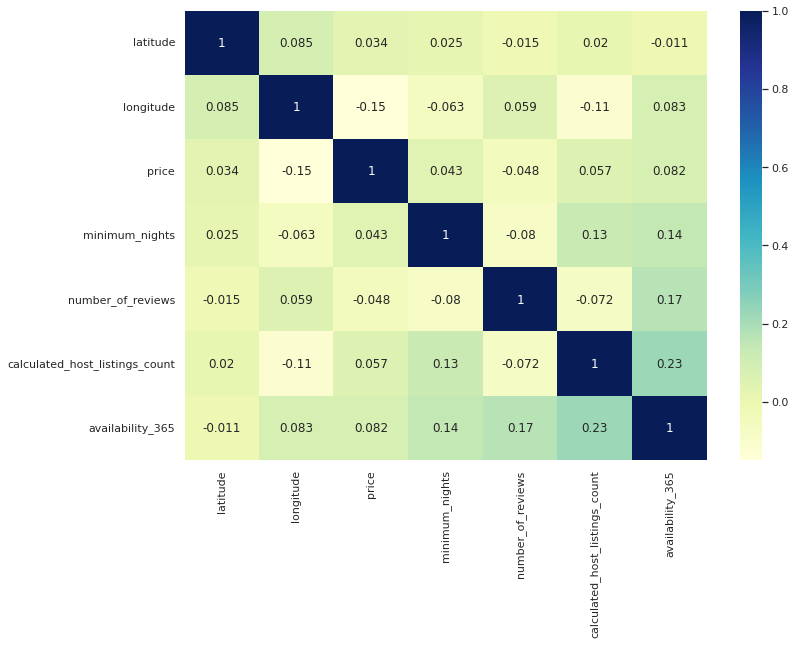

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

**All columns are numerically independent according to the correlation matrix**

## **Distribution of categorical columns**

## **neighbourhood_group**

Plotting the count plot of different neighbourhod_group

Text(0.5, 1.0, 'Neighbourhood Group')

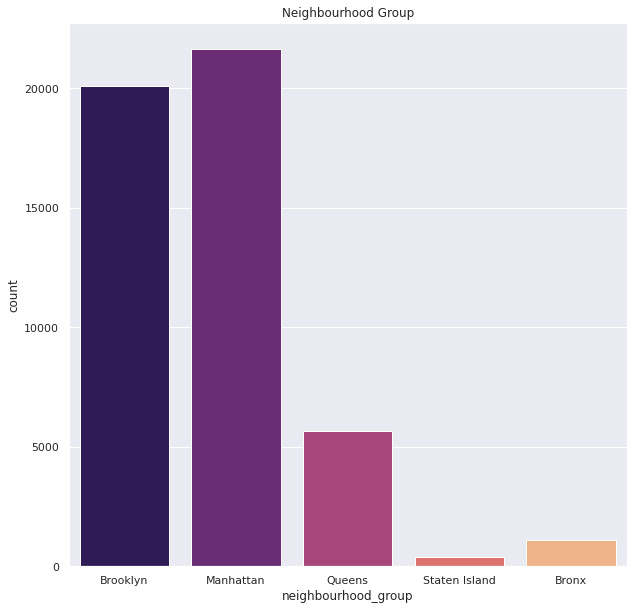

In [21]:
sns.countplot(df['neighbourhood_group'], palette="magma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

*Most of the properties are located in Manhattan and Brooklyn follwed by Queens, Bronx and Staten Island respectively.*

## **neighbourhood**

**to increase the readability of the neighbourhood count plots ,each plot was created based on their respective neighbourhood_group category**

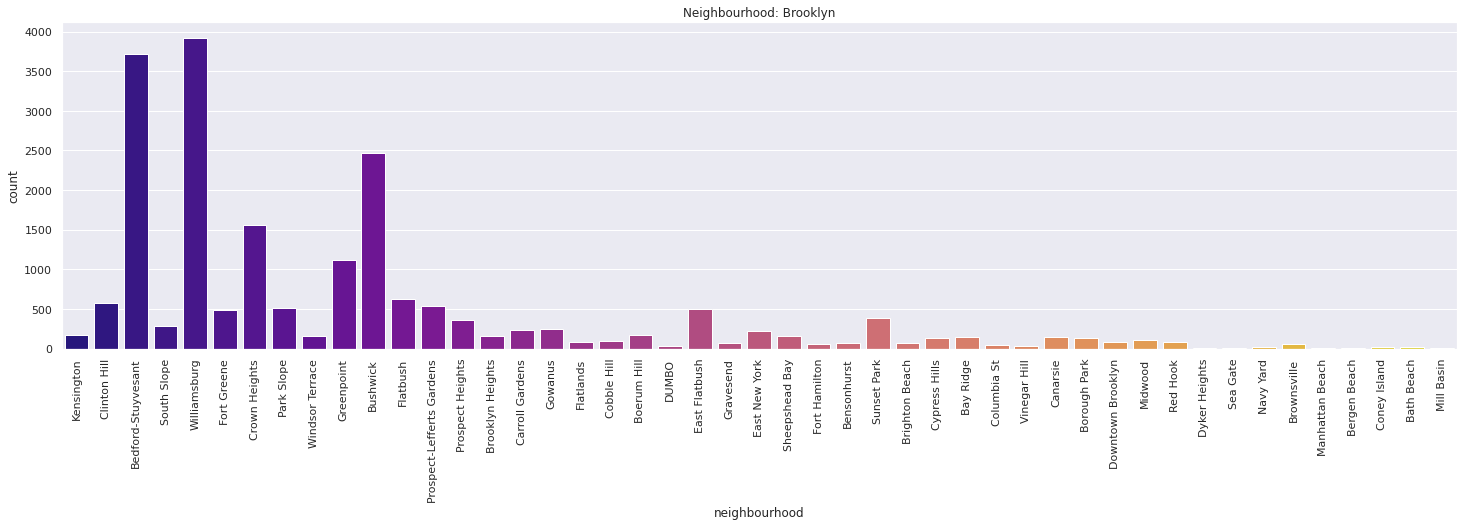

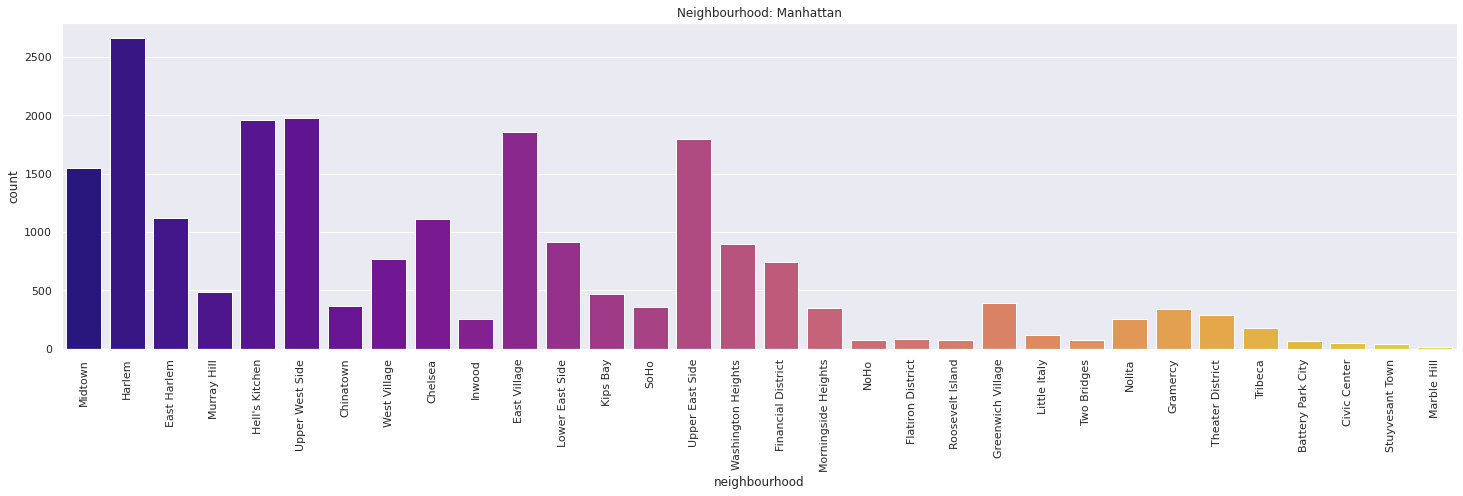

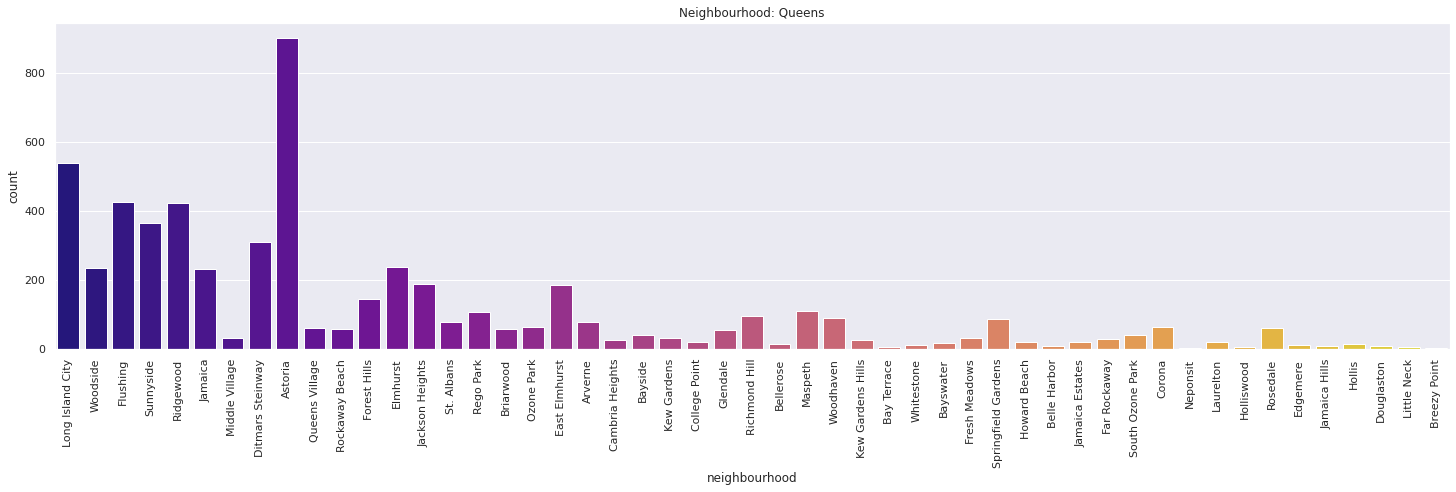

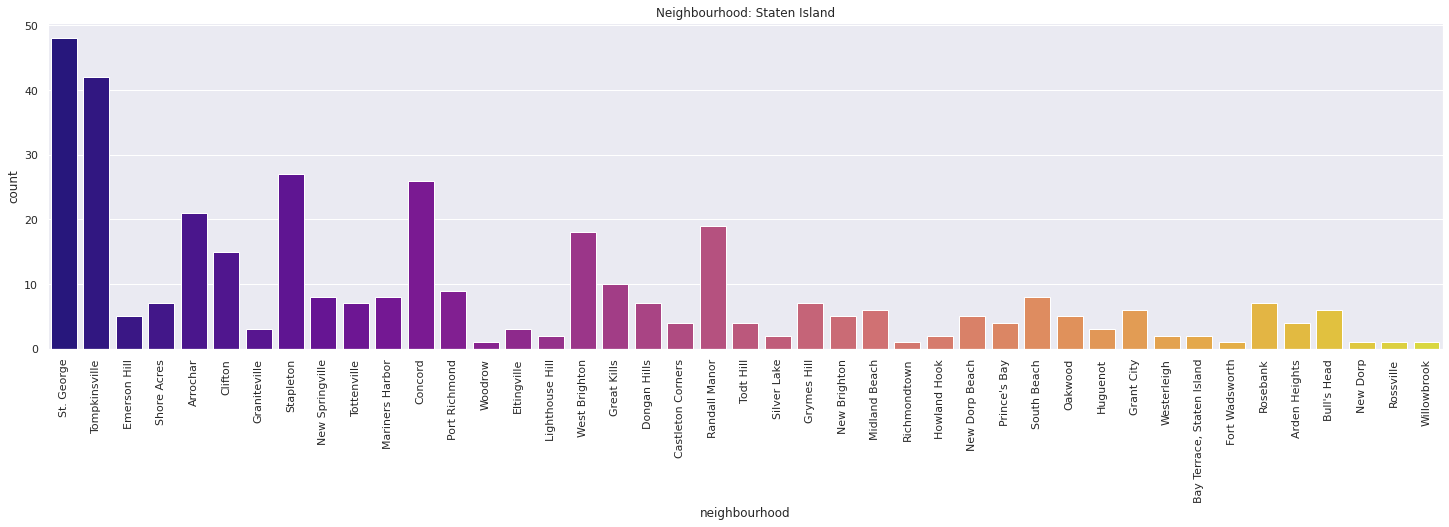

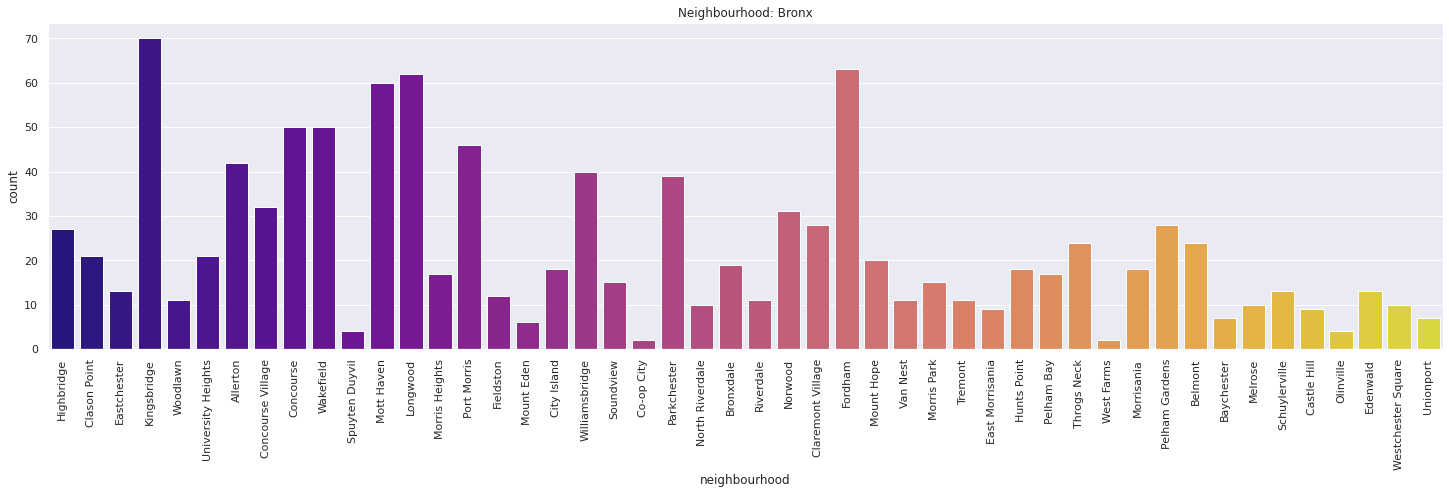

In [22]:
for i in df['neighbourhood_group'].unique():

  sns.countplot(df[df['neighbourhood_group']== i]['neighbourhood'], palette="plasma")
  fig = plt.gcf()
  fig.set_size_inches(25,6)
  plt.title('Neighbourhood: ' + str(i))
  plt.tick_params(axis='x', rotation=90)
  plt.show()

## **room_type**

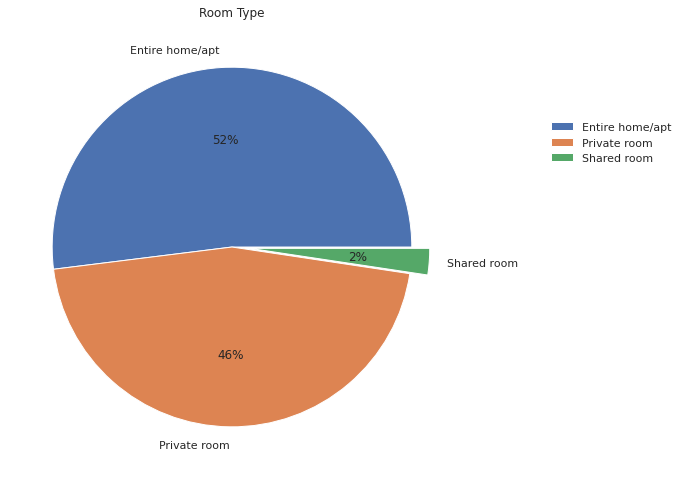

In [23]:
vc = pd.DataFrame((df['room_type'].value_counts(normalize = True ) * 100) )
fig, ax = plt.subplots()
labels = vc.index.tolist()
percentages = vc.room_type.tolist()
explode=(0,0,0.1)
ax.pie(percentages,explode = explode, labels = labels,autopct='%1.0f%%')
ax.set_title("Room Type")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

*The Entire home / apt and Private room as room type have the most number of count and Shared room has the least.*

# **Now the distributions plot for each of the numerical coloumns are as follows**

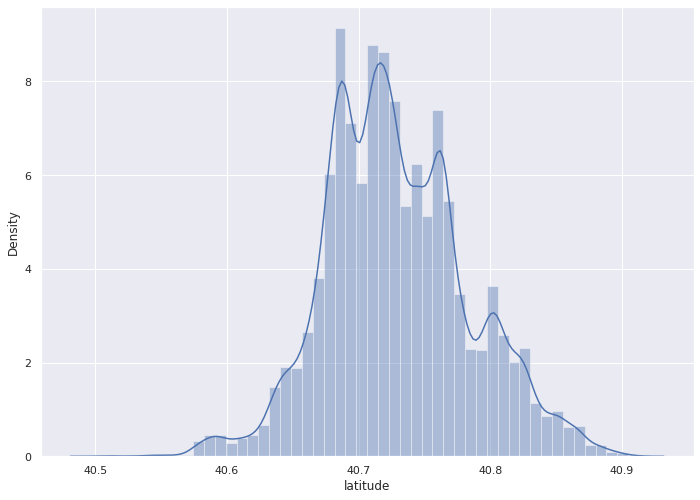

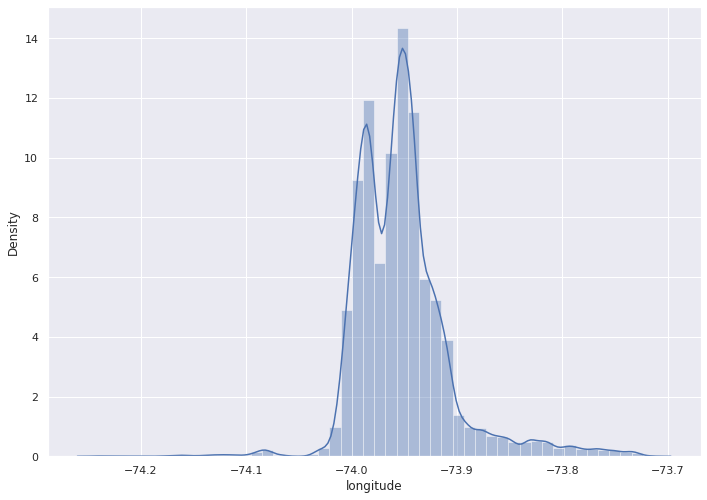

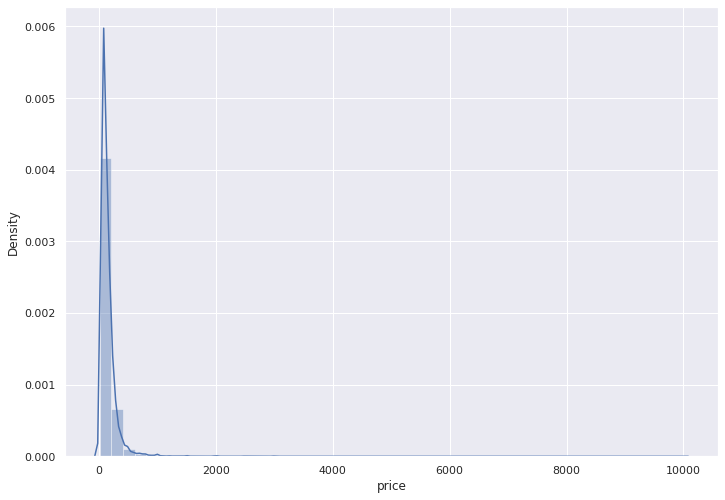

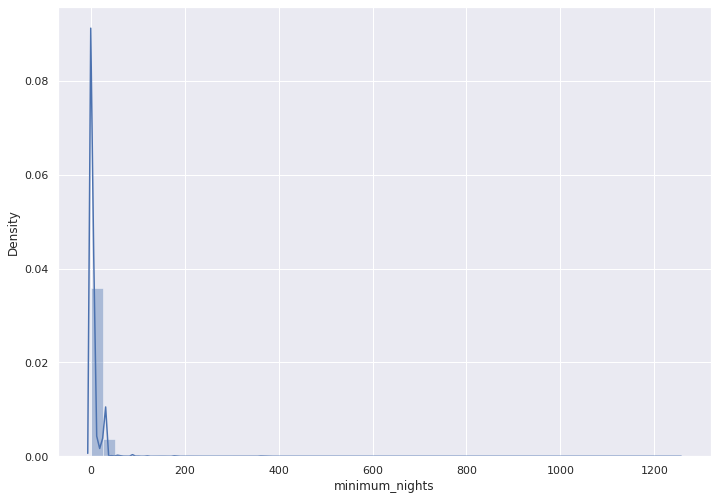

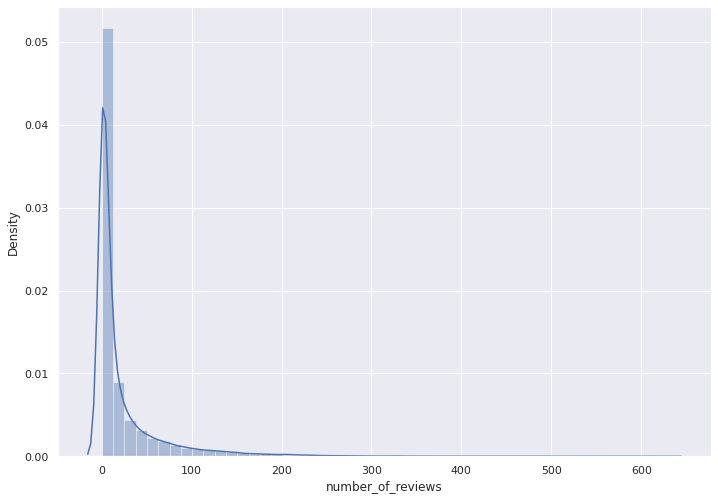

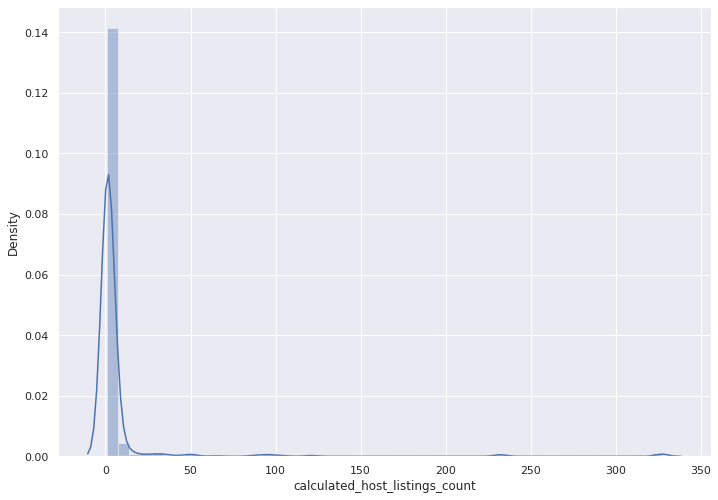

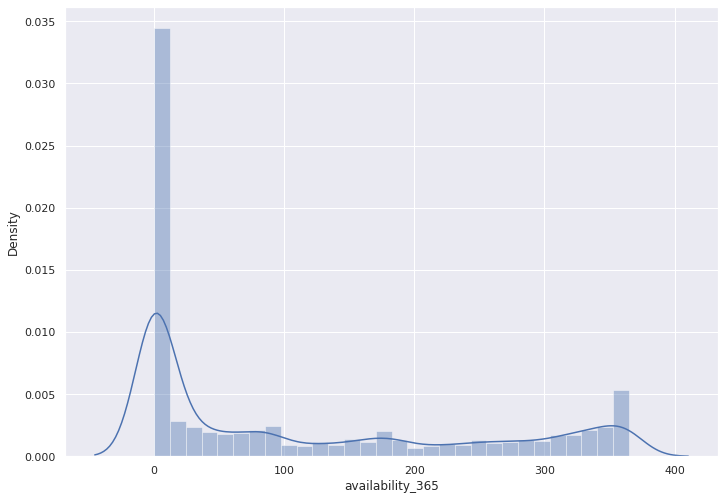

In [24]:
for i in df.columns:
  if df[i].dtype != 'object':
    sns.distplot(df[i])
    plt.show()

# **What is the average price based on location and room type?**

In [25]:
average_price_df = pd.DataFrame(df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack())
average_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.890937,59.800000
Brooklyn,178.346202,76.545428,50.773723
Manhattan,249.257994,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


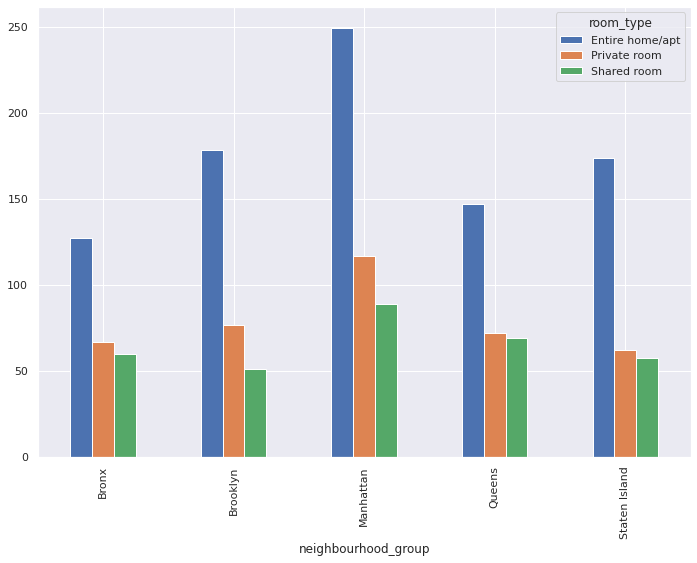

In [26]:
average_price_df.plot.bar()
sns.set(rc={'figure.figsize':(10,8)})
plt.show()

*From the mean price we can observe the average prices for Entire home/apt is the most but there is no significant difference between the prices of Shared room and Private Room in most of the neighbourhood_group*

## **Minimum and Maximum prices in different neighbourhood according to room type**

In [27]:
min_and_max_df = pd.DataFrame(df.groupby(['neighbourhood_group','room_type'])['price'].describe()[['min','max']].unstack())
min_and_max_df

min               ...          max            
room_type           Entire home/apt Private room  ... Private room Shared room
neighbourhood_group                               ...                         
Bronx                          28.0         10.0  ...       2500.0       800.0
Brooklyn                       10.0         10.0  ...       7500.0       725.0
Manhattan                      10.0         10.0  ...       9999.0      1000.0
Queens                         10.0         10.0  ...      10000.0      1800.0
Staten Island                  48.0         20.0  ...        300.0       150.0

[5 rows x 6 columns]

*The min price for entire home / apt as room type in Manhattan and Brooklyn is \$10 and maximum goes upto \$10000.*  

*For each room type the mean price for Manhattan is the most which makes it the most expensive place to stay.*

# **Find the total count of each room type according to neighbourhood_group**

In [28]:
count_room_type = pd.DataFrame(df.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack())
count_room_type

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,651,60
Brooklyn,9558,10126,411
Manhattan,13198,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


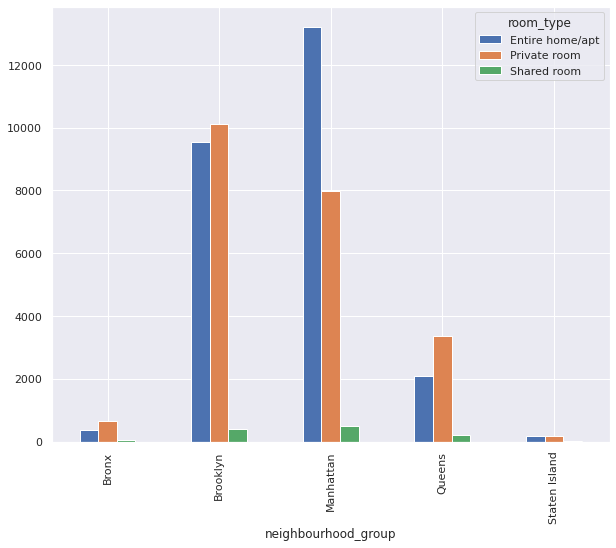

In [29]:
count_room_type.plot.bar()
plt.show()

*Manhattan has the maximum number of Entire home / apt as room_type and Brooklyn has the maximum number of Private room.*

# **Find the relationship between neighbourhood group and availability of rooms**

In [30]:
avalaibilty_df = pd.DataFrame(df.groupby(['neighbourhood_group','room_type'])['availability_365'].median().unstack()).astype('int')
avalaibilty_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,131,158,89
Brooklyn,28,24,156
Manhattan,42,29,81
Queens,89,108,175
Staten Island,176,282,37


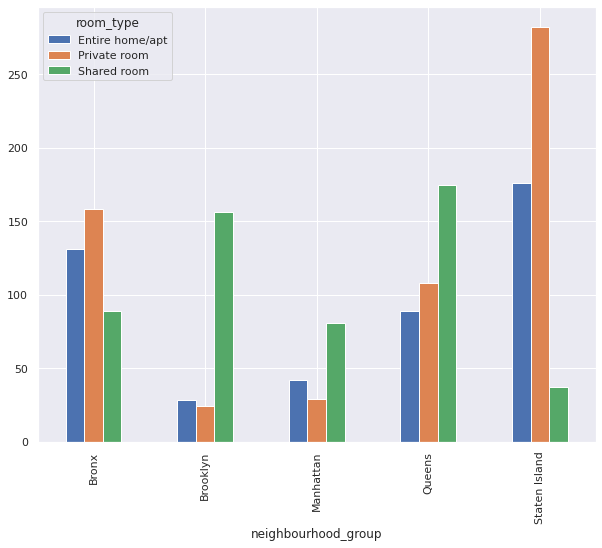

In [31]:
avalaibilty_df.plot.bar()
plt.show()

*The avalaibilty of all room types is relatively low in Manhattan hence it is the most occupied neighborhood of NYC*

# **Plotting the scatter plot of avalaibilty according to longitude and latitude**

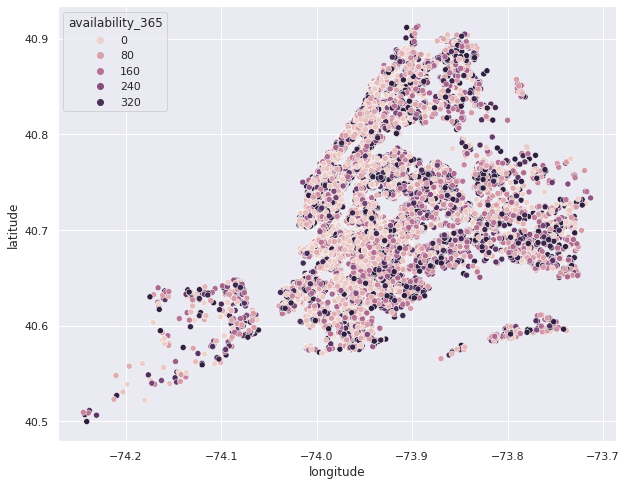

In [32]:
sns.scatterplot(df.longitude,df.latitude,hue=df.availability_365)
plt.ioff()

# **Plotting the scatter plot of neighbourood_group according to longitude and latitude**

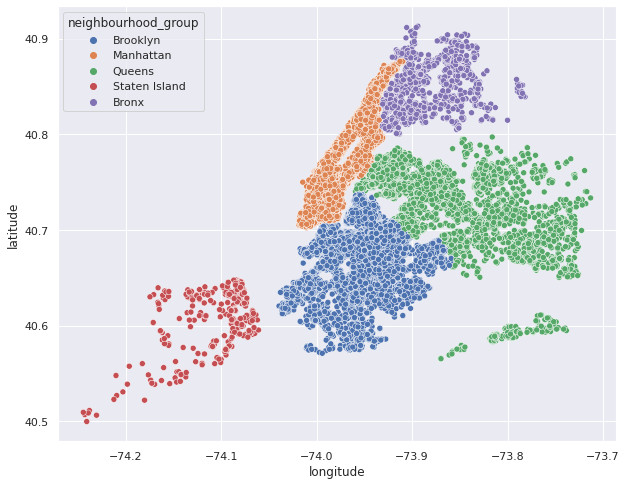

In [33]:
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

# **Average number of nights stay in every room type in neighbourhood**

In [34]:
nights_stays_df = pd.DataFrame(df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].mean().unstack())
nights_stays_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,5.957784,3.861751,3.366667
Brooklyn,6.531492,5.541675,7.644769
Manhattan,10.539855,5.446880,6.766667
Queens,5.369752,5.120107,4.232323
Staten Island,6.238636,3.632979,2.333333


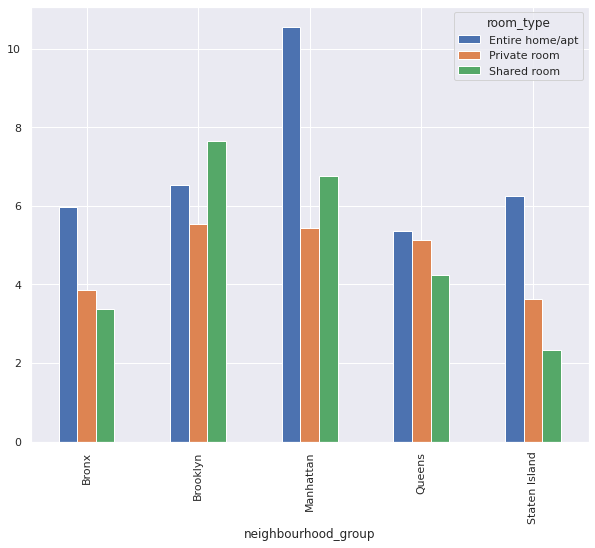

In [35]:
nights_stays_df.plot.bar()
plt.show()